# Table of Contents
-[Introduction](#introduction)  
-[Import Libraries](#import-libraries)  
-[Load the Dataset](#load-the-dataset)  
-[Overview of the Dataset](overview-of-the-dataset)  
-[Merging the Dataframes](merging-the-dataframes)  
-[Date Manipulation](date-manipulation)  
-[Exploratory Data Analysis](exploratory-data-analysis)  
-[Data Cleaning](data-cleaning)  
-[Model Development](model-development)  
-[Model Evaluation on Test Data](model-evaluation-on-test-data)  
-[Submission of Results](submission-of-results)

# Introduction  
This is my first ever attempt to participate in a competition. I chose in this competetion because it seems to me a rather simple and easy task where I can apply my skills and abilities to gain in depth knowledge as well as to connect with the Data Analytics community.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The basic libraries are imported while rest will be imported as and when needed during the work.

# Load the Dataset

In [2]:
item_categories = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
items = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
shops = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
train = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
test = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')

# Overview of the Dataset

In [3]:
print('First Five Rows of item_categories Dataframe')
print(item_categories.head(5))
print(' ')
print('First Five Rows of items Dataframe')
print(items.head(5))
print(' ')
print('First Five Rows of shops Dataframe')
print(shops.head(5))
print(' ')
print('First Five Rows of train Dataframe')
print(train.head(5))
print(' ')
print('First Five Rows of test Dataframe')
print(test.head(5))

First Five Rows of item_categories Dataframe
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
 
First Five Rows of items Dataframe
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
 
First Five Rows of shops Dataframe
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1 

# Merging the Dataframes 

We will now merge the 'train' & 'test' dataframes with 'items' and 'item_categories' on the basis of a similar column in each dataframe.

In [4]:
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')
test = test.merge(items, on="item_id", how="left")
test = test.merge(item_categories, on="item_category_id", how="left")

In [5]:
train.dtypes

date                   object
date_block_num          int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_day          float64
item_name              object
item_category_id        int64
item_category_name     object
dtype: object

In [6]:
test.dtypes

ID                     int64
shop_id                int64
item_id                int64
item_name             object
item_category_id       int64
item_category_name    object
dtype: object

# Date Manipulation

As the date column in train dataframe is object type, so we will convert it to datetime type.

In [7]:
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y")

In [8]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [9]:
test.head(5)

,ID,shop_id,item_id,item_name,item_category_id,item_category_name
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
1,1,5,5320,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360
4,4,5,5268,"Need for Speed [PS4, русская версия]",20,Игры - PS4


# Exploratory Data Analysis

In [10]:
# daily sales
sales_daily = train.groupby('date')['item_cnt_day'].sum()
sales_daily.head(5)

date
2013-01-01    1951.0
2013-01-02    8198.0
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
Name: item_cnt_day, dtype: float64

In [11]:
# Extract month from the date
train['month'] = train['date'].dt.month_name()
# monthly sales
sales_monthly = sales_daily.resample('ME').sum()
sales_monthly.head(5)

date
2013-01-31    131479.0
2013-02-28    128090.0
2013-03-31    147142.0
2013-04-30    107190.0
2013-05-31    106970.0
Freq: ME, Name: item_cnt_day, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


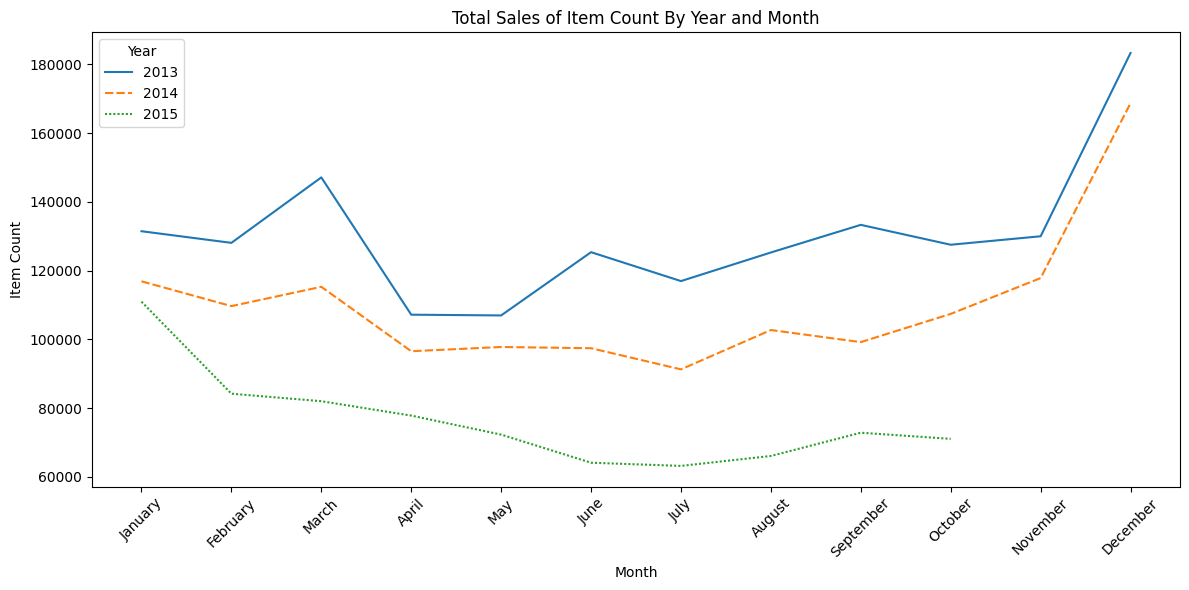

In [12]:
# Extract year from the date
train['year'] = train['date'].dt.year

# Define the desired sequence of months
month_sequence = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']

# Group by year and month, then calculate total sales
sales_yearly_monthly = train.groupby(['year', 'month'])['item_cnt_day'].sum().unstack()

# Reindex the columns to ensure the months are in the correct order
sales_yearly_monthly = sales_yearly_monthly.reindex(columns=month_sequence)

# Plot sales by month and by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_yearly_monthly.T)  # Transpose for correct plotting
plt.title('Total Sales of Item Count By Year and Month')
plt.xlabel('Month')
plt.ylabel('Item Count')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

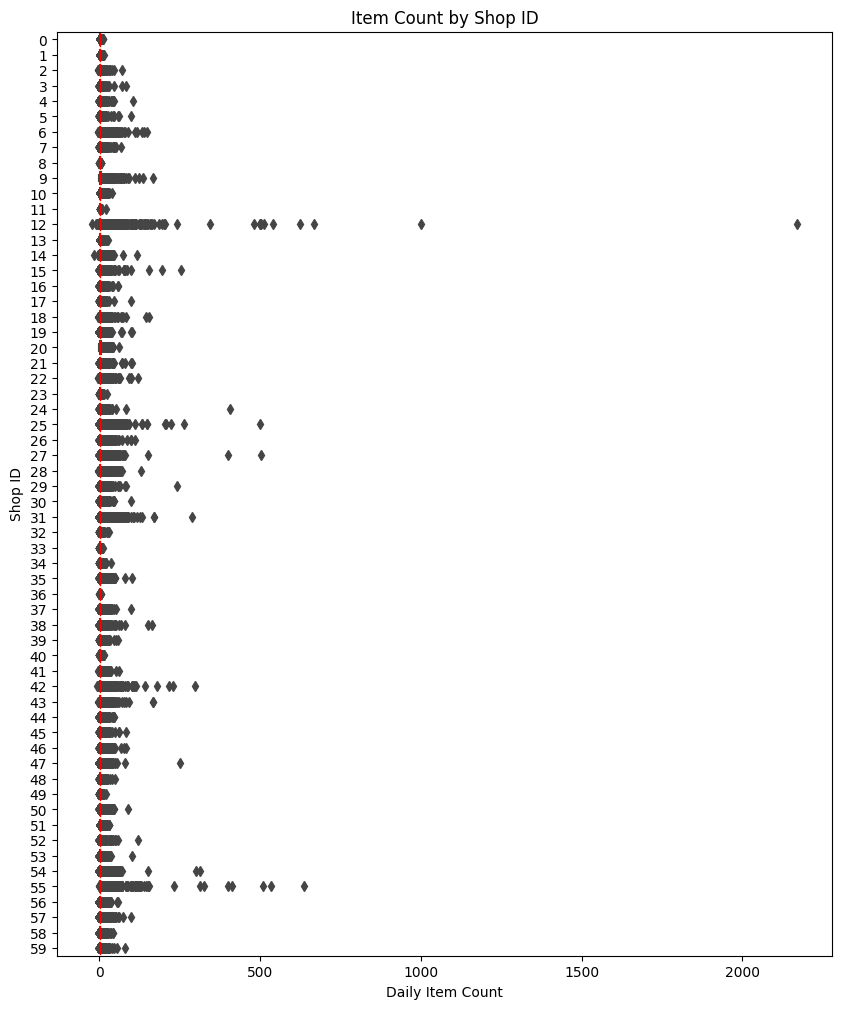

In [13]:
# To view the outliers in Sales of Item Counts by shop Id
plt.figure(figsize=(10, 12))
sns.boxplot(y='shop_id', x='item_cnt_day', data=train, orient='h',
           medianprops={"color": "r", "linewidth": 1})
plt.title('Item Count by Shop ID')
plt.xlabel('Daily Item Count')
plt.ylabel('Shop ID')
plt.show()

In [14]:
# Deal with Outliers

import scipy.stats as stats

print('Mean of item count per day: ',train.item_cnt_day.mean())
print('99.9th quantile of item count: ',train.item_cnt_day.quantile(0.999))
print('Mean of item price: ',train.item_price.mean())
print('99.9th quantile of item price: ',train.item_price.quantile(0.999))

Mean of item count per day:  1.242640885140891
99.9th quantile of item count:  22.0
Mean of item price:  890.8532326980126
99.9th quantile of item price:  23990.0


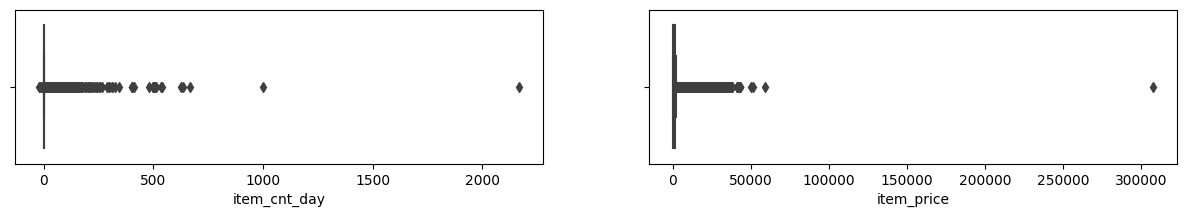

In [15]:
fig, axes = plt.subplots(1,2, figsize = (15,2))
_ = sns.boxplot(x=train.item_cnt_day, ax=axes[0])
_ = sns.boxplot(x=train.item_price, ax=axes[1])

In [16]:
train.duplicated().sum()

6

In [17]:
train.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
month                 0
year                  0
dtype: int64

# Data Cleaning

In [18]:
train[train.item_price<0]
train = train[(train.item_price < train.item_price.quantile(0.99999)) & (train.item_price > 0)]
train = train[train.item_cnt_day < train.item_cnt_day.quantile(0.99999)]

In [19]:
train = train.drop_duplicates()

In [20]:
train['total_sales'] = train['item_price'] * train['item_cnt_day']

monthly_sales = train.groupby(['date_block_num', 'shop_id'], as_index=False).agg({'total_sales': 'sum'})

# Model Development

In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [22]:
# Feature set and target variable
X = monthly_sales[['date_block_num', 'shop_id']]  # Example feature set
y = monthly_sales['total_sales']  # Target variable

In [23]:
# Splitting data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Defining the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],  # Number of boosting rounds
    'learning_rate': [0.01, 0.2],  # Learning rate
    'max_depth': [3, 5],  # Maximum depth of trees
    'subsample': [0.7, 1.0],  # Fraction of samples for fitting individual trees
    'colsample_bytree': [0.7, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.2]  # Minimum loss reduction required to make a split
}

In [25]:
# Initializing the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Setting up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # Optimizing for MSE
                           cv=5,  # 5-fold cross-validation
                           verbose=1,  # Output progress
                           n_jobs=-1)  # Use all available cores

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1.0], 'gamma': [0, 0.2],
                         'learning_rate': [0.01, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.7, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [26]:
# Extracting the best hyperparameters and score
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_score = grid_search.best_score_
print("Best Score (negative MSE):", best_score)

Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Score (negative MSE): -636682790739.3701


In [27]:
# Getting the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the training set
train_predictions = best_model.predict(X_train)
print("Training Predictions:", train_predictions)

# Making predictions on the validation set
y_pred = best_model.predict(X_val)

# Evaluating the model performance
mse_final = mean_squared_error(y_val, y_pred)
rmse_final = np.sqrt(mse_final)  # Root Mean Squared Error
r2_final = r2_score(y_val, y_pred)  # R-squared

# Printing the final results
print("Final Model RMSE:", rmse_final)
print("Final Model R-squared:", r2_final)

Training Predictions: [1423738.9 1513360.4 5617436.5 ... 1531625.5  538184.6 3790729.2]
Final Model RMSE: 778565.759291599
Final Model R-squared: 0.7648210541065101


# Model Evaluation on Test Data

In [28]:
test['date_block_num'] = max(train['date_block_num']) + 1

In [29]:
# Predict the total sales for the test set
test_X = test[['date_block_num', 'shop_id']]

test['y_test_pred'] = best_model.predict(test_X)

# Submission of Results

In [30]:
# Save the predictions
test[['ID', 'y_test_pred']].rename(columns={'y_test_pred': 'item_cnt_month'}).to_csv('submission.csv', index=False)


In [31]:
submissions = pd.read_csv('/kaggle/working/submission.csv')
submissions.tail(5)

,ID,item_cnt_month
214195,214195,929660.0
214196,214196,929660.0
214197,214197,929660.0
214198,214198,929660.0
214199,214199,929660.0
